#                              EDA

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_json("/product_matcher/data/data.json")

In [4]:
df.columns

Index(['page_part_title', 'page_part_number', 'page_part_description',
       'page_part_product_group', 'page_part_manufacturer',
       'client_part_manufacturer', 'client_part_number', 'client_part_type',
       'client_part_internal_number', 'client_part_product_group',
       'client_part_price', 'page_part_price', 'label'],
      dtype='object')

In [15]:
print(df.shape)
print(df.dtypes)
print(df.head(5))
print(df.isna().sum())

(5000, 13)
page_part_title                 object
page_part_number                object
page_part_description           object
page_part_product_group         object
page_part_manufacturer          object
client_part_manufacturer        object
client_part_number              object
client_part_type                object
client_part_internal_number     object
client_part_product_group       object
client_part_price              float64
page_part_price                float64
label                            int64
dtype: object
                                     page_part_title  \
0         SMC-VENTILE AN120-X200 (NAN) SCHALLDÄMPFER   
1                             MERIT MESSING 04601-20   
2  Zahnriemen zöllig 390 H 100 78 Zähne Wirklänge...   
3  Siemens Indus.Sector Leistungsschalter 3RV2021...   
4  M10 DIN 603 Stahl A2 Edelstahl Flachrundschrau...   

                                    page_part_number  \
0                                               None   
1                  

In [14]:
print(df.describe())

       client_part_price  page_part_price        label
count        5000.000000     5.000000e+03  5000.000000
mean          534.277612     3.395298e+17     0.245400
std          2491.546204     2.400838e+19     0.430367
min             0.010000     5.770000e-08     0.000000
25%            16.560000     9.664900e+00     0.000000
50%            65.730000     3.835500e+01     0.000000
75%           270.995000     1.499250e+02     0.000000
max        108151.010000     1.697649e+21     1.000000


In [16]:
dup_rows = df.duplicated().sum()
print(f"Full duplicate rows: {dup_rows}")

Full duplicate rows: 0


In [17]:
df

,page_part_title,page_part_number,page_part_description,page_part_product_group,page_part_manufacturer,client_part_manufacturer,client_part_number,client_part_type,client_part_internal_number,client_part_product_group,client_part_price,page_part_price,label
0,SMC-VENTILE AN120-X200 (NAN) SCHALLDÄMPFER,None,None,None,SMC-VENTILE SMC-VENTILE AN120-X200 (NAN) SCHAL...,ELGES,"GELENKKOPF D25-20 - M16X1,5",None,00-0100-04-45-08,Wälzlager Zubehör,50.74,9.13,0
1,MERIT MESSING 04601-20,04601-20,Produktinformationen:\n\nUPC671404080099,Home,MERIT BRASS,Roemheld Group,0460-1020,4601020,3715418,Gruppe 1,139.96,18.05,0
2,Zahnriemen zöllig 390 H 100 78 Zähne Wirklänge...,390H100 Zahnriemen zöllig 390 H 100 78 Zähne W...,None,None,Zahnriemen zöllig 390 H 100 78 Zähne Wirklänge...,HERKT,390H100,None,279735600000,EA,9.79,20.92,0
3,Siemens Indus.Sector Leistungsschalter 3RV2021...,3RV20214DA25,None,None,Siemens Indus.Sector,SIEMENS AG,3RV2021-4DA25,None,99-0650-38-00-73,Schaltgeräte,59.02,76.54,1
4,M10 DIN 603 Stahl A2 Edelstahl Flachrundschrau...,M10 DIN 603 Stahl A2 Edelstahl Flachrundschrau...,DIN 603 Stahl A2 Edelstähle Flachrundschrauben...,None,M10 DIN 603 Stahl A2 Edelstahl Flachrundschrau...,Seifert Drucklufttechnik GmbH,111809 262.04-ES,"1/2"" EDELSTAHL",2910362,Rohrleitungstechnik,5.10,8.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Original moloco b12 box,Original moloco b12 box,barang ready stok silahkan di order langsung b...,Obat Alergi / Sinus / Atshma,Original moloco b12 box,INA,KB12-PP,None,683808100001,E4,14.88,19.34,0
4996,"Kermi L-KON S Typ33 BH140x194x3000mm AB U, m. ...","Kermi L-KON S Typ33 BH140x194x3000mm AB U, m. ...","Kermi L-KON S Typ33 BH140x194x3000mm AB U, m. ...",None,"Kermi L-KON S Typ33 BH140x194x3000mm AB U, m. ...",Fricke und Mallah,"94 X 34 X 30,1",None,00-0100-12-16-53,Ersatzteile/-Pakete,260.32,2387.35,0
4997,Gummidichtung für Staubsaugerbeutel Vorwerk Ko...,EPA-888100812,"Neuware, originalverpackt\nKein Originalproduk...",None,AccuCell,SKODOCK,DICHTUNG 40 - 57 - 2,None,99-0300-77-55-00,Dichtungen,2.63,2.93,0
4998,Arduino Nano 3.0 (A000005) | ARDUINO,Arduino Nano 3.0 (A000005),Arduino Nano 3.0 (A000005) ARDUINO - Entwicklu...,"Maker Boards für Entwicklung, Test oder Bildung",ARDUINO,SKF,SY 20 TF,None,00-0100-02-40-69,Sonderlager,40.83,19.94,0


In [19]:
df_match = df[df["label"] == 1]

print(f"Number of matches: {len(df_match)}")

Number of matches: 1227


In [20]:
df_match

,page_part_title,page_part_number,page_part_description,page_part_product_group,page_part_manufacturer,client_part_manufacturer,client_part_number,client_part_type,client_part_internal_number,client_part_product_group,client_part_price,page_part_price,label
3,Siemens Indus.Sector Leistungsschalter 3RV2021...,3RV20214DA25,None,None,Siemens Indus.Sector,SIEMENS AG,3RV2021-4DA25,None,99-0650-38-00-73,Schaltgeräte,59.02,76.54,1
15,SCHNEIDER ELECTRIC XVB-C9B BUZZER 12-48VAC/DC,XVB-C9B,SCHNEIDER ELECTRIC XVB-C9B BUZZER 12-48VAC/DC ...,"Elektronik, Elektrotechnik",SchneiderElectric,Telemecanique,XVB-C9B,60023,21016570,Hupe,108.31,110.31,1
18,Festo DSBC-32-200-PPVA-N3 Zugstangenzylinder ø...,Festo 1376429 100% Festo DSBC-32-200-PPVA-N3 ...,Festo DSBC-32-200-PPVA-N3 Zugstangenzylinder ø...,"Compressed air, Pneumatic work links: Tie rod ...",Festo 1376429 100% Festo DSBC-32-200-PPVA-N3 ...,Festo,zp3741,1376429,2920040,Gruppe 1,128.16,106.02,1
20,"6002-2RSH (INDUSTRIE), Rillenkugellager einrei...",6002-2RSH,"6002-2RSH (INDUSTRIE), Rillenkugellager einrei...",Rillenkugellager,SKF,SCHWARZ GMBH,6002-2RSH,Rillenkugellager 6002 15X32X 9 2RSH,1014610,Radiallager,6.00,9.46,1
22,"Switch Actuator, Eaton M22 Series Selector Swi...",M22S-WRS,Cumpărați M22S-WRS - Eaton Moeller - [produs]....,Switches & Relays,EATON MOELLER,Eaton,M22S-WRS-MS2,111772,738230900000,E,31.20,50.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,"Siemens Leistungsschalter 1,1-1,6A 3RV2021-1AA20",3RV20211AA20,Leistungsschalter Baugröße S0 für den Motorsch...,Niederspannungsschaltgeräte: Leistungsschalter...,Siemens,SIEMENS AG A&D Bielefeld,3RV2021-1AA20,"1,1-1,6A CLASS 10 CAGE",4881330,"Elektro-, Automatisi",54.93,57.04,1
4984,80SD100XD.C044-01 - ACOPOSmicro Schrittmotormo...,80SD100XD.C044-01,B+R: 80SD100XD.C044-01 - ACOPOSmicro Schrittmo...,"Warehouse 2064, B&R - Artikel: ACOPOSmicro",B+R,B&R Industrie-Elektronik,None,80SD100XD.C044-01,10441894,sonstige Antriebe,1103.38,1042.92,1
4985,HFOE-D-MINI,159638 HFOE-D-MINI,None,None,Festo,FESTO,159638,HFOE-D-MINI*,6956,DACH,7.59,9.29,1
4989,"Sensor,ind.,M12x1 1S,f.:400Hz,DC,IP67 IF5579",IF5579,Breite des Sensors: 17 mm | Höhe des Sensors:...,"Niederspannungs-Schalttechnik, Näherungsschalt...",ifm electronic,IFM ELECTRONIC,IF5579,IF5579,53954356,E35 Sensors and measuring units,29.27,52.34,1


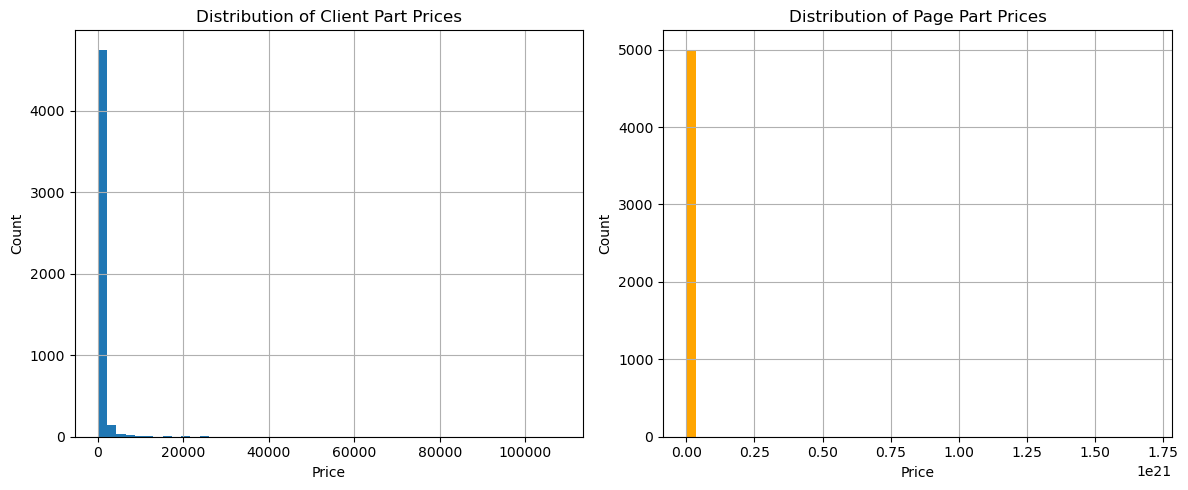

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Client prices
plt.subplot(1,2,1)
df["client_part_price"].dropna().hist(bins=50)
plt.title("Distribution of Client Part Prices")
plt.xlabel("Price")
plt.ylabel("Count")

# Page prices
plt.subplot(1,2,2)
df["page_part_price"].dropna().hist(bins=50, color="orange")
plt.title("Distribution of Page Part Prices")
plt.xlabel("Price")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

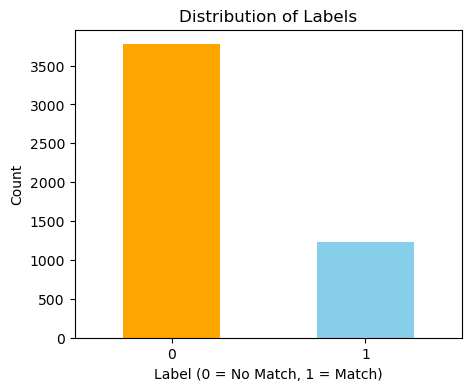

label
0    3773
1    1227
Name: count, dtype: int64


In [22]:
# Count labels
label_counts = df["label"].value_counts()

# Bar plot
plt.figure(figsize=(5,4))
label_counts.plot(kind="bar", color=["orange","skyblue"])
plt.title("Distribution of Labels")
plt.xlabel("Label (0 = No Match, 1 = Match)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

print(label_counts)

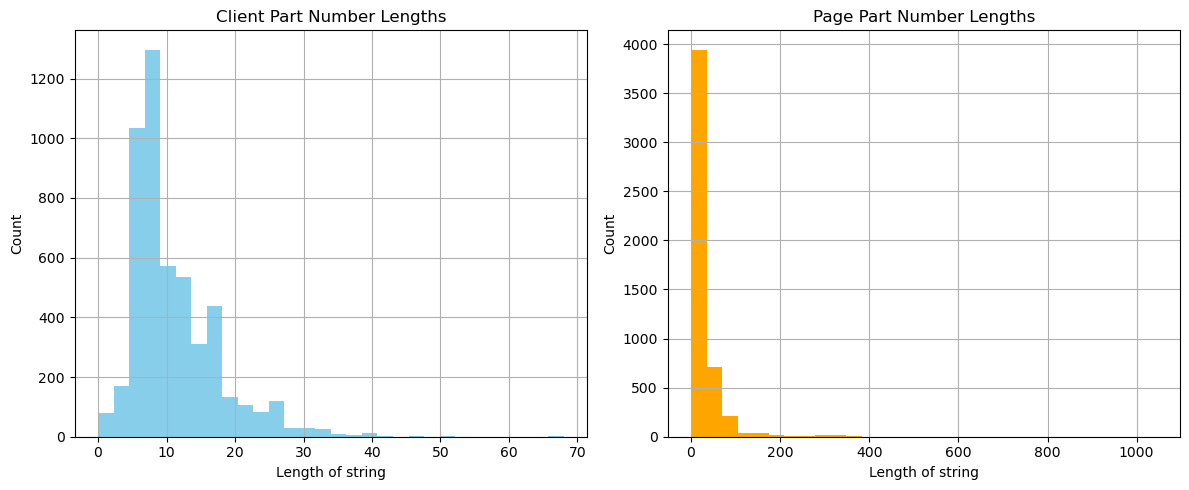

In [23]:
# Create new columns with string lengths
df["client_pn_length"] = df["client_part_number"].fillna("").astype(str).str.len()
df["page_pn_length"]   = df["page_part_number"].fillna("").astype(str).str.len()

# Plot histograms side by side
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df["client_pn_length"].hist(bins=30, color="skyblue")
plt.title("Client Part Number Lengths")
plt.xlabel("Length of string")
plt.ylabel("Count")

plt.subplot(1,2,2)
df["page_pn_length"].hist(bins=30, color="orange")
plt.title("Page Part Number Lengths")
plt.xlabel("Length of string")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

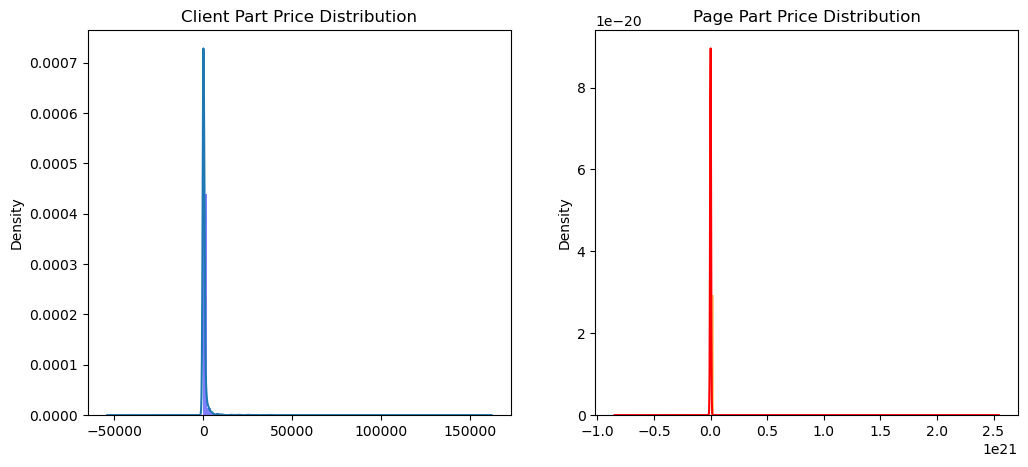

In [25]:
plt.figure(figsize=(12,5))

# Client prices
plt.subplot(1,2,1)
df["client_part_price"].dropna().plot(kind="hist", bins=50, density=True, alpha=0.5, color="blue")
df["client_part_price"].dropna().plot(kind="kde")
plt.title("Client Part Price Distribution")

# Page prices
plt.subplot(1,2,2)
df["page_part_price"].dropna().plot(kind="hist", bins=50, density=True, alpha=0.5, color="orange")
df["page_part_price"].dropna().plot(kind="kde", color="red")
plt.title("Page Part Price Distribution")

plt.show()

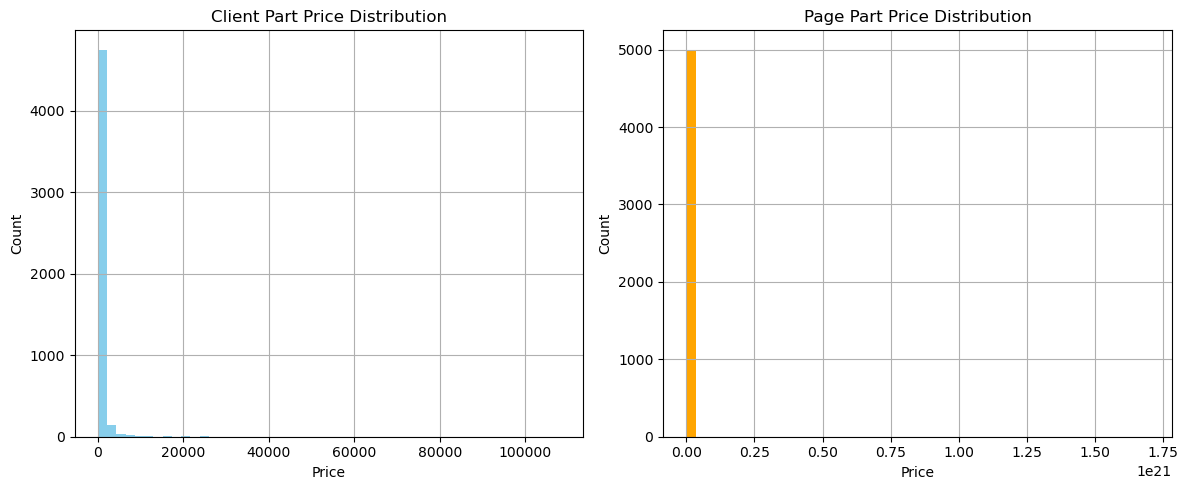

In [26]:
plt.figure(figsize=(12,5))

# Client prices
plt.subplot(1,2,1)
df["client_part_price"].dropna().hist(bins=50, color="skyblue")
plt.title("Client Part Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")

# Page prices
plt.subplot(1,2,2)
df["page_part_price"].dropna().hist(bins=50, color="orange")
plt.title("Page Part Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

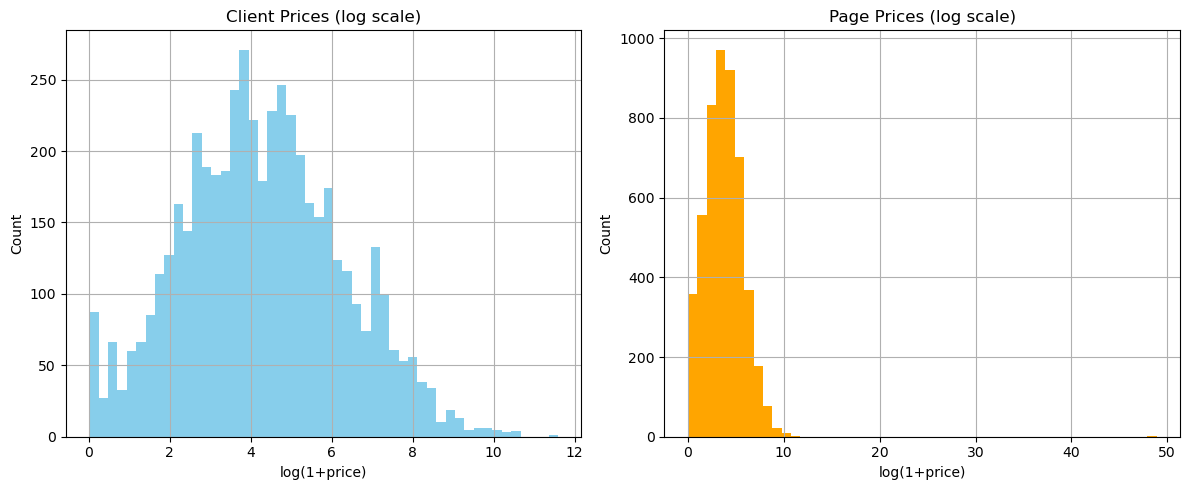

In [29]:
plt.figure(figsize=(12,5))

# Client prices
plt.subplot(1,2,1)
np.log1p(df["client_part_price"].dropna()).hist(bins=50, color="skyblue")
plt.title("Client Prices (log scale)")
plt.xlabel("log(1+price)")
plt.ylabel("Count")

# Page prices
plt.subplot(1,2,2)
np.log1p(df["page_part_price"].dropna()).hist(bins=50, color="orange")
plt.title("Page Prices (log scale)")
plt.xlabel("log(1+price)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

/var/folders/9h/dq07x5r50wqd4360627fl7q40000gn/T/ipykernel_46594/2671155038.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


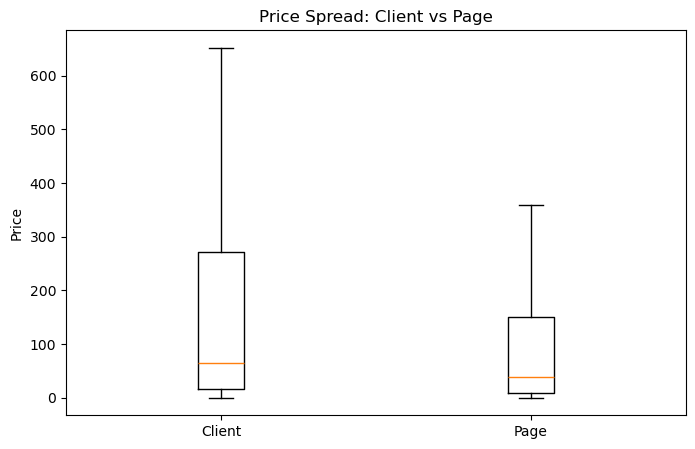

In [33]:
plt.figure(figsize=(8,5))
plt.boxplot(
    [df["client_part_price"].dropna(), df["page_part_price"].dropna()],
    labels=["Client", "Page"],
    showfliers=False   # hides extreme dots so you can see the box
)
plt.title("Price Spread: Client vs Page")
plt.ylabel("Price")
plt.show()

In [ ]:
Compare price difference by label

In [34]:
df["price_diff_rel"] = abs(df["client_part_price"] - df["page_part_price"]) / \
                       df[["client_part_price", "page_part_price"]].max(axis=1)

<Figure size 800x500 with 0 Axes>

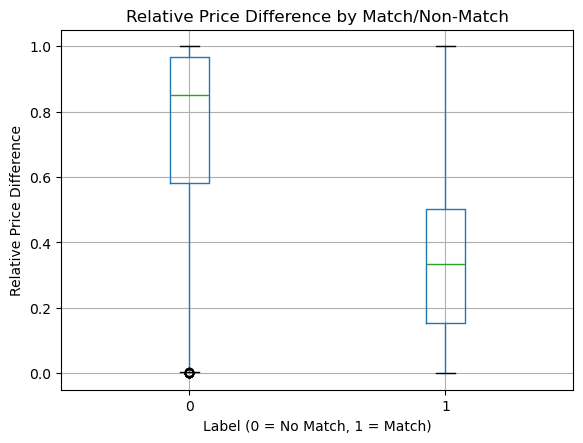

In [35]:
plt.figure(figsize=(8,5))
df.boxplot(column="price_diff_rel", by="label")
plt.title("Relative Price Difference by Match/Non-Match")
plt.suptitle("")   # remove automatic pandas title
plt.xlabel("Label (0 = No Match, 1 = Match)")
plt.ylabel("Relative Price Difference")
plt.show()

In [36]:
# sanity check

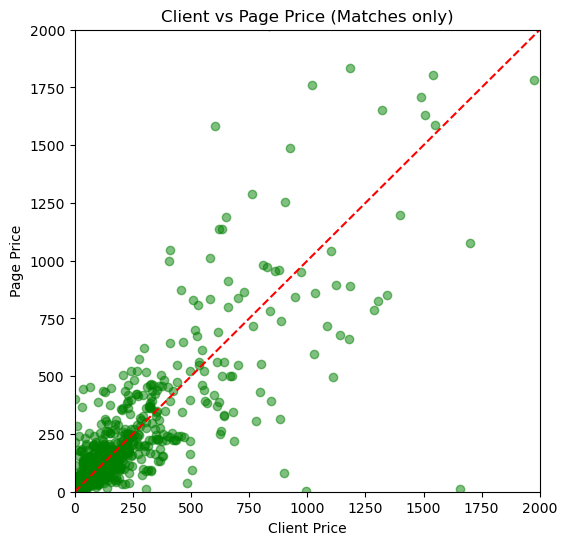

In [37]:
df_match = df[df["label"] == 1]

plt.figure(figsize=(6,6))
plt.scatter(df_match["client_part_price"], df_match["page_part_price"], 
            alpha=0.5, color="green")

plt.title("Client vs Page Price (Matches only)")
plt.xlabel("Client Price")
plt.ylabel("Page Price")
plt.xlim(0, 2000)   # adjust limits for readability
plt.ylim(0, 2000)
plt.plot([0,2000], [0,2000], color="red", linestyle="--")  # perfect equality line
plt.show()

In [38]:
corr = df_match[["client_part_price", "page_part_price"]].corr()
print(corr)

                   client_part_price  page_part_price
client_part_price           1.000000         0.335815
page_part_price             0.335815         1.000000


In [39]:
df_match["price_diff_rel"] = abs(df_match["client_part_price"] - df_match["page_part_price"]) / \
                             df_match[["client_part_price","page_part_price"]].max(axis=1)

print(df_match["price_diff_rel"].describe())

count    1227.000000
mean        0.350400
std         0.230858
min         0.001841
25%         0.154415
50%         0.333418
75%         0.502309
max         0.999975
Name: price_diff_rel, dtype: float64


/var/folders/9h/dq07x5r50wqd4360627fl7q40000gn/T/ipykernel_46594/3264876511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match["price_diff_rel"] = abs(df_match["client_part_price"] - df_match["page_part_price"]) / \


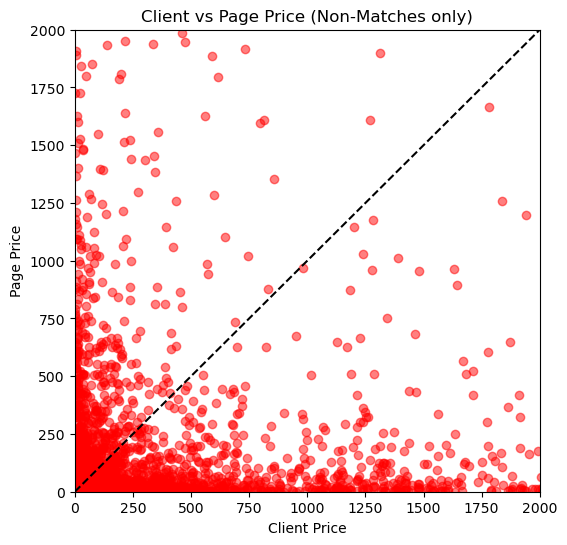

In [40]:
# Filter for non-matches
df_nonmatch = df[df["label"] == 0]

plt.figure(figsize=(6,6))
plt.scatter(df_nonmatch["client_part_price"], 
            df_nonmatch["page_part_price"], 
            alpha=0.5, color="red")

plt.title("Client vs Page Price (Non-Matches only)")
plt.xlabel("Client Price")
plt.ylabel("Page Price")
plt.xlim(0, 2000)   # same limits as match plot for fair comparison
plt.ylim(0, 2000)

# Add diagonal line for reference
plt.plot([0,2000], [0,2000], color="black", linestyle="--")

plt.show()

In [41]:
# Create a boolean column: manufacturer exact match
df["manu_match"] = (df["client_part_manufacturer"].fillna("").str.upper()
                    == df["page_part_manufacturer"].fillna("").str.upper())

# Group by label and compute mean (True=1, False=0 → mean = match rate)
manu_match_rate = df.groupby("label")["manu_match"].mean()
print(manu_match_rate)

label
0    0.013517
1    0.242869
Name: manu_match, dtype: float64


In [ ]:
label=1 → 0.24 (24% of matches have same manufacturer)

label=0 → 0.01(only 1% of non-matches have same manufacturer)

In [ ]:
2. Part number equality

In [42]:
# Create a boolean column: part number exact match
df["pn_match"] = (df["client_part_number"].fillna("").str.upper()
                  == df["page_part_number"].fillna("").str.upper())

pn_match_rate = df.groupby("label")["pn_match"].mean()
print(pn_match_rate)

label
0    0.039226
1    0.462918
Name: pn_match, dtype: float64


In [43]:
from collections import Counter

In [44]:
from collections import Counter
import pandas as pd

# Combine all words from page titles + descriptions
words = " ".join(df["page_part_title"].fillna("").astype(str) + " " +
                 df["page_part_description"].fillna("").astype(str))

# Split and count
word_counts = Counter(words.upper().split())

# Get top 20
top_words = pd.DataFrame(word_counts.most_common(20), columns=["Word","Count"])
print(top_words)

       Word  Count
0         |  13316
1       FÜR   3394
2         -   3035
3       UND   3002
4       MIT   2688
5       DER   2085
6        MM   2021
7        IN   1645
8       DIE   1410
9      NEIN   1323
10        X   1273
11        /   1173
12      BEI   1061
13      FOR   1052
14        1   1035
15      THE    936
16        A    924
17      VON    855
18        V    715
19  SIEMENS    687


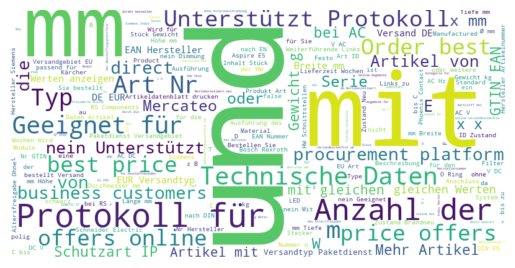

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, background_color="white").generate(words)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [46]:
!pip install wordcloud

In [ ]:
2. Spot words that often signal mismatches

In [48]:
keywords = ["BACKFORM", "CUPCAKE", "LAMPE"]

for kw in keywords:
    df[kw] = df["page_part_title"].str.upper().str.contains(kw, na=False)
    print(kw, df.groupby("label")[kw].mean())

BACKFORM label
0    0.000265
1    0.000000
Name: BACKFORM, dtype: float64
CUPCAKE label
0    0.0
1    0.0
Name: CUPCAKE, dtype: float64
LAMPE label
0    0.002915
1    0.002445
Name: LAMPE, dtype: float64


In [ ]:
3. Product group overlaps (client vs page)

In [49]:
df["group_match"] = (df["client_part_product_group"].fillna("").str.upper() ==
                     df["page_part_product_group"].fillna("").str.upper())

print(df.groupby("label")["group_match"].mean())

label
0    0.000000
1    0.002445
Name: group_match, dtype: float64


In [ ]:
1. Compute string lengths

In [50]:
# Ensure strings, replace NaN with empty
df["client_pn_len"] = df["client_part_number"].fillna("").astype(str).str.len()
df["page_pn_len"]   = df["page_part_number"].fillna("").astype(str).str.len()

In [ ]:
histogram of lengths

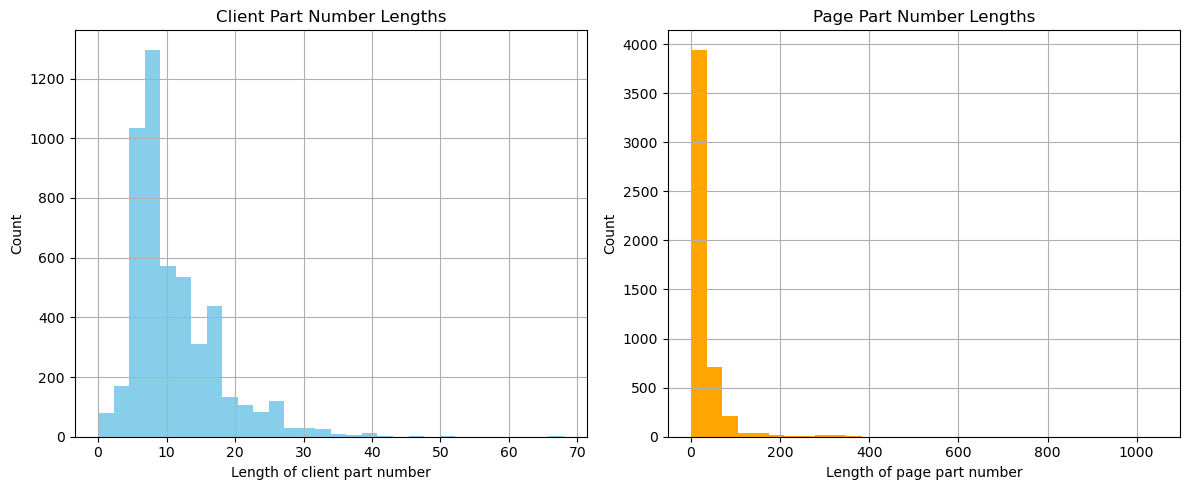

In [51]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df["client_pn_len"].hist(bins=30, color="skyblue")
plt.title("Client Part Number Lengths")
plt.xlabel("Length of client part number")
plt.ylabel("Count")

plt.subplot(1,2,2)
df["page_pn_len"].hist(bins=30, color="orange")
plt.title("Page Part Number Lengths")
plt.xlabel("Length of page part number")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
3. Spot outliers (very short or very long)

In [52]:
short_client = df[df["client_pn_len"] <= 2][["client_part_number"]]
long_client  = df[df["client_pn_len"] >= 30][["client_part_number"]]

short_page = df[df["page_pn_len"] <= 2][["page_part_number"]]
long_page  = df[df["page_pn_len"] >= 30][["page_part_number"]]

print("Short client part numbers:\n", short_client.head())
print("Long client part numbers:\n", long_client.head())
print("Short page part numbers:\n", short_page.head())
print("Long page part numbers:\n", long_page.head())

Short client part numbers:
     client_part_number
76                None
79                None
140               None
166               None
195               None
Long client part numbers:
                                     client_part_number
5                     BEIDSEITIG DKOS-12 VERSCHRAUBUNG
8               860.300 Rep.satz 4200RX Dichtungspaket
13                    MESSUMFORMER DMV4000, 100/230VAC
196  Schlauch mit Gewebeeinlage PVC Di=16x4mm max.1...
232                0 820 022 998                      
Short page part numbers:
     page_part_number
0               None
138             None
157             None
171             None
277             None
Long page part numbers:
                                      page_part_number
2   390H100 Zahnriemen zöllig 390 H 100 78 Zähne W...
4   M10 DIN 603 Stahl A2 Edelstahl Flachrundschrau...
7   DIN 931 / ISO 4014 Stahl 8.8 feuerverzinkt M 3...
9   Y - Balg 2100-10348 bis Bj. 77 für Deckel FP1 ...
13     Messumformer Endress+Ha

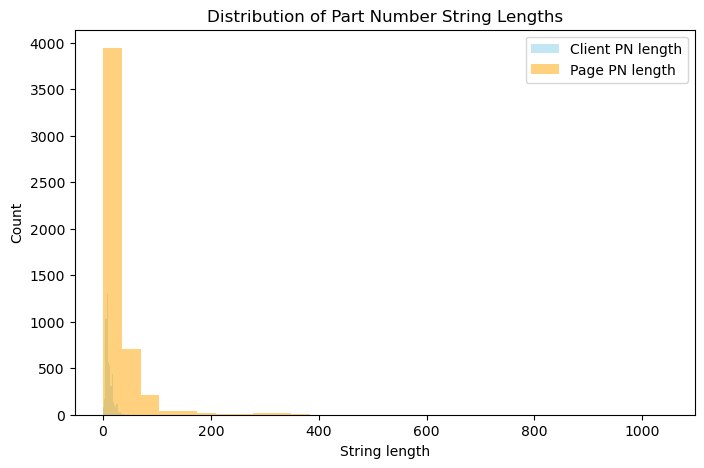

In [53]:

plt.figure(figsize=(8,5))

plt.hist(df["client_pn_len"], bins=30, alpha=0.5, label="Client PN length", color="skyblue")
plt.hist(df["page_pn_len"],   bins=30, alpha=0.5, label="Page PN length",   color="orange")

plt.title("Distribution of Part Number String Lengths")
plt.xlabel("String length")
plt.ylabel("Count")
plt.legend()
plt.show()

In [54]:
print("Top 10 client manufacturers:")
print(df["client_part_manufacturer"].value_counts().head(10))

Top 10 client manufacturers:
client_part_manufacturer
Kahmann & Ellerbrock GmbH & Co.     107
Siemens                             106
Siemens AG                          102
Festo-Pneumatik                      94
FESTO                                91
Fegime Deutschland                   81
SIEMENS AG A&D Bielefeld             76
Festo Vertrieb GmbH & Co. KG         75
SKF                                  72
INA                                  69
Name: count, dtype: int64


In [55]:
print("Top 10 page manufacturers:")
print(df["page_part_manufacturer"].value_counts().head(10))

Top 10 page manufacturers:
page_part_manufacturer
Siemens               228
Festo                 153
Phoenix Contact        69
SKF                    59
FESTO                  46
SIEMENS                42
Eaton                  37
Schneider Electric     32
Murrelektronik         32
INA                    32
Name: count, dtype: int64


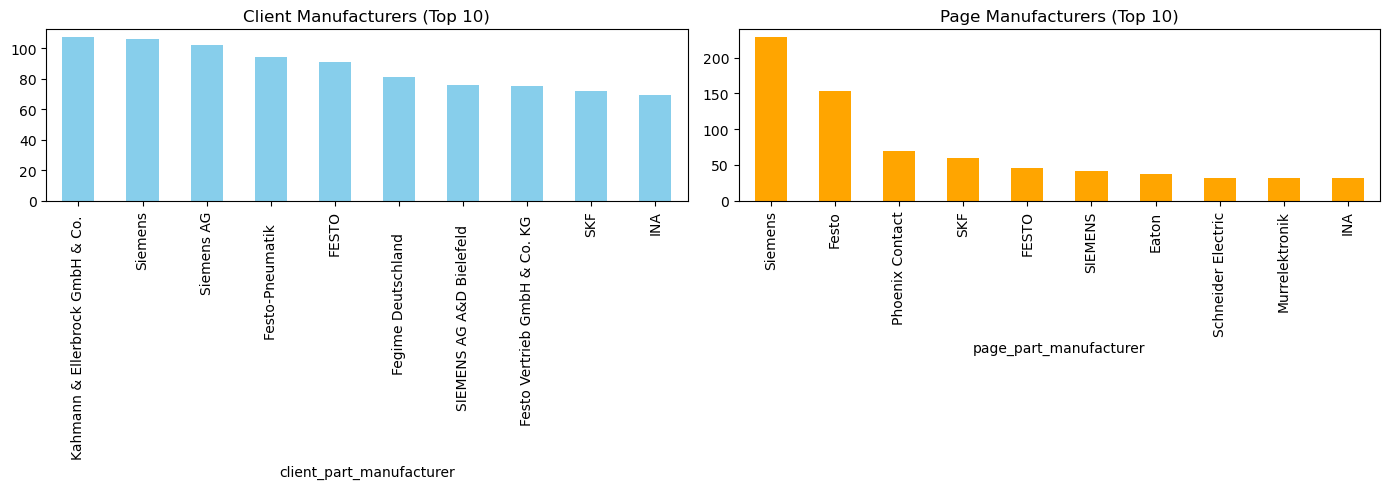

In [56]:

fig, axes = plt.subplots(1, 2, figsize=(14,5))

df["client_part_manufacturer"].value_counts().head(10).plot(
    kind="bar", ax=axes[0], color="skyblue", title="Client Manufacturers (Top 10)")

df["page_part_manufacturer"].value_counts().head(10).plot(
    kind="bar", ax=axes[1], color="orange", title="Page Manufacturers (Top 10)")

plt.tight_layout()
plt.show()

In [57]:
client_top = df.groupby("label")["client_part_manufacturer"].value_counts(normalize=True).unstack(fill_value=0)
page_top   = df.groupby("label")["page_part_manufacturer"].value_counts(normalize=True).unstack(fill_value=0)

print("Client manufacturer distribution by label:\n", client_top.head(10))
print("Page manufacturer distribution by label:\n", page_top.head(10))

Client manufacturer distribution by label:
 client_part_manufacturer       SKF  #B & R Industrie-Elektronik GmbH    \
label                                                                    
0                         0.000265                            0.001325   
1                         0.000000                            0.000000   

client_part_manufacturer  #Festo AG & Co.KG -gesperrt-    \
label                                                      
0                                               0.001060   
1                                               0.000815   

client_part_manufacturer  #Helling & Neuhaus GmbH&Co.KG     \
label                                                        
0                                                  0.00053   
1                                                  0.00000   

client_part_manufacturer  #Koch *Kreditor 42543 verwenden*     \
label                                                           
0                                      

In [58]:
print("Top client product groups:")
print(df["client_part_product_group"].value_counts().head(10))

print("Top page product groups:")
print(df["page_part_product_group"].value_counts().head(10))

Top client product groups:
client_part_product_group
Gruppe 1                400
Warengruppe 1 Kanneg    238
Unknown                 225
E                       177
Rohrleitungstechnik     154
USA                     144
Unbekannt               136
Dichtungen              130
DACH                    120
Elektro-, Automatisi    101
Name: count, dtype: int64
Top page product groups:
page_part_product_group
Schalter & Steckdosen    28
Divers                   28
Startseite               26
Electrics                19
Installation             18
Suchergebnis             18
Pneumatics               16
Machine Parts            15
Industrie                13
Schrauben                12
Name: count, dtype: int64


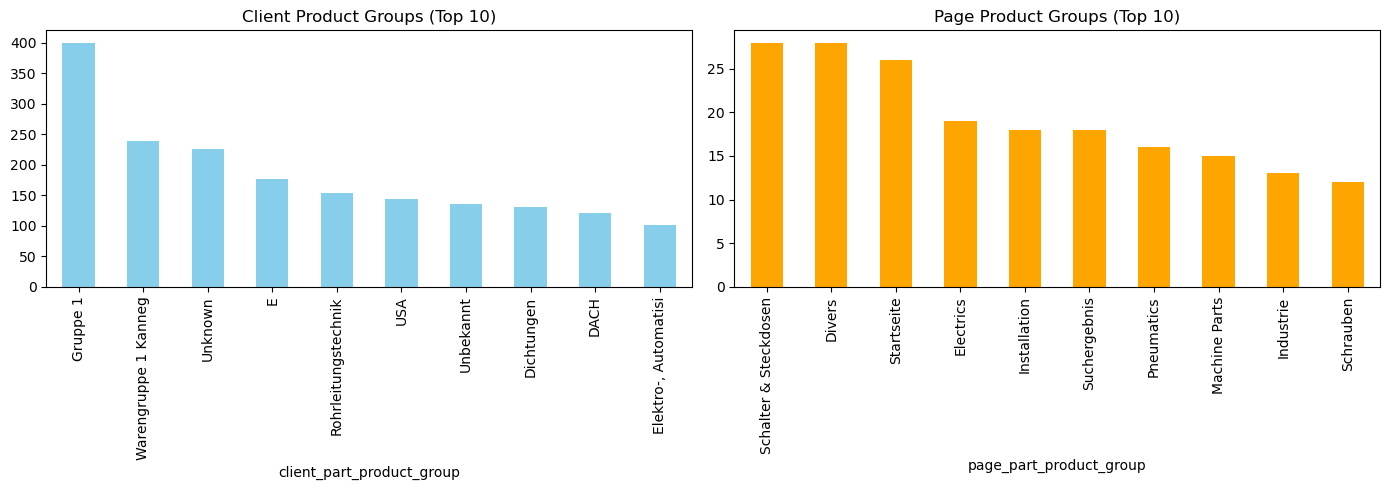

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

df["client_part_product_group"].value_counts().head(10).plot(
    kind="bar", ax=axes[0], color="skyblue", title="Client Product Groups (Top 10)")

df["page_part_product_group"].value_counts().head(10).plot(
    kind="bar", ax=axes[1], color="orange", title="Page Product Groups (Top 10)")

plt.tight_layout()
plt.show()

In [60]:
df["group_match"] = (
    df["client_part_product_group"].fillna("").str.upper() ==
    df["page_part_product_group"].fillna("").str.upper()
)

print(df.groupby("label")["group_match"].mean())

label
0    0.000000
1    0.002445
Name: group_match, dtype: float64


In [62]:
print("Client price stats:\n", df["client_part_price"].describe())
print("\nPage price stats:\n", df["page_part_price"].describe())

# Top 5 highest page prices
print("\nTop 5 highest page prices:\n", df.nlargest(5, "page_part_price")[["page_part_price","page_part_title"]])

# Bottom 5 (excluding 0 or NaN)
print("\nLowest positive page prices:\n", df[df["page_part_price"]>0].nsmallest(5, "page_part_price")[["page_part_price","page_part_title"]])


Client price stats:
 count      5000.000000
mean        534.277612
std        2491.546204
min           0.010000
25%          16.560000
50%          65.730000
75%         270.995000
max      108151.010000
Name: client_part_price, dtype: float64

Page price stats:
 count    5.000000e+03
mean     3.395298e+17
std      2.400838e+19
min      5.770000e-08
25%      9.664900e+00
50%      3.835500e+01
75%      1.499250e+02
max      1.697649e+21
Name: page_part_price, dtype: float64

Top 5 highest page prices:
       page_part_price                                    page_part_title
3480     1.697649e+21   Taktgeber für Kondensatableiter Typ »drukodrain«
4441     9.531243e+04                              TIMKEN JM738249-90AA1
4700     4.840100e+04         23130.EMW33, SNR Pendelrollenlager Premier
3722     3.993300e+04  Z-1,50X15,0X062,5-03-180-1.4310, Gutekunst Zug...
2965     3.977344e+04                                        L-600 L-600

Lowest positive page prices:
       page_part_price  

In [63]:
# Already computed string lengths earlier
print(df["client_pn_len"].describe())
print(df["page_pn_len"].describe())

# Very short or very long
print("Suspiciously short client part numbers:\n", df[df["client_pn_len"] <= 2][["client_part_number"]].head())
print("Suspiciously long client part numbers:\n", df[df["client_pn_len"] >= 30][["client_part_number"]].head())

print("Suspiciously short page part numbers:\n", df[df["page_pn_len"] <= 2][["page_part_number"]].head())
print("Suspiciously long page part numbers:\n", df[df["page_pn_len"] >= 30][["page_part_number"]].head())


count    5000.000000
mean       11.137200
std         6.551104
min         0.000000
25%         6.000000
50%         9.000000
75%        14.000000
max        68.000000
Name: client_pn_len, dtype: float64
count    5000.000000
mean       25.125200
std        42.303752
min         0.000000
25%         7.000000
50%        11.000000
75%        26.000000
max      1045.000000
Name: page_pn_len, dtype: float64
Suspiciously short client part numbers:
     client_part_number
76                None
79                None
140               None
166               None
195               None
Suspiciously long client part numbers:
                                     client_part_number
5                     BEIDSEITIG DKOS-12 VERSCHRAUBUNG
8               860.300 Rep.satz 4200RX Dichtungspaket
13                    MESSUMFORMER DMV4000, 100/230VAC
196  Schlauch mit Gewebeeinlage PVC Di=16x4mm max.1...
232                0 820 022 998                      
Suspiciously short page part numbers:
     pa

In [64]:
df["price_diff_rel"] = abs(df["client_part_price"] - df["page_part_price"]) / \
                       df[["client_part_price","page_part_price"]].max(axis=1)

# Look at matched pairs with big price differences
suspicious = df[(df["label"]==1) & (df["price_diff_rel"] > 0.8)]
print("Suspicious matches (label=1 but prices very different):\n",
      suspicious[["client_part_number","client_part_price","page_part_number","page_part_price","label"]].head())


Suspicious matches (label=1 but prices very different):
     client_part_number  client_part_price  \
260          5SY6110-6              21.18   
284            HK 1616              12.75   
332            HK 1616              12.48   
542               None               1.98   
587             277950               0.01   

                                      page_part_number  page_part_price  label  
260                                           5SY61106             3.77      1  
284                                  Nadelhülse HK1616             0.70      1  
332                                  Nadelhülse HK1616             0.70      1  
542                                     09 14 012 3001            27.04      1  
587  1St. Eaton DILM150-XHI22 277950 Hilfsschalterb...            11.58      1  


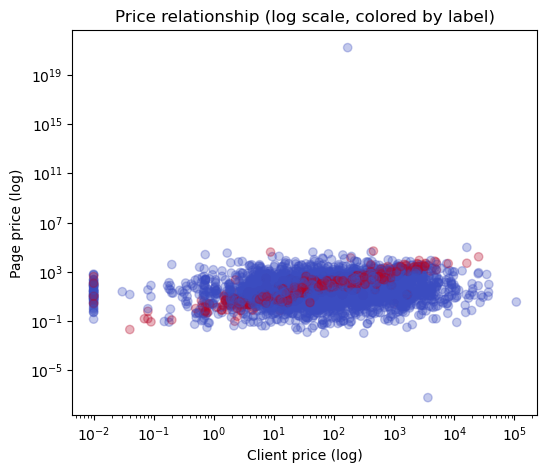

In [65]:
plt.figure(figsize=(6,5))
plt.scatter(df["client_part_price"], df["page_part_price"], alpha=0.3, c=df["label"], cmap="coolwarm")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Client price (log)")
plt.ylabel("Page price (log)")
plt.title("Price relationship (log scale, colored by label)")
plt.show()